<a href="https://colab.research.google.com/github/Mehedi-Bin-Hafiz/python-crash-course/blob/master/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description : This program classifies images

In [ ]:
#Import the libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

ImportError: ignored

In [ ]:
#Load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
#Look at the data tyypes of variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
#Get the shape of the arrays
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
#Take a look at the first image as array
index = 25
x_train[index]

array([[[162, 164, 130],
        [164, 167, 128],
        [169, 171, 131],
        ...,
        [184, 176, 137],
        [190, 186, 146],
        [202, 198, 161]],

       [[153, 151, 119],
        [158, 156, 120],
        [164, 163, 124],
        ...,
        [178, 171, 131],
        [189, 184, 143],
        [201, 198, 158]],

       [[157, 151, 120],
        [161, 156, 121],
        [164, 160, 122],
        ...,
        [178, 170, 131],
        [190, 186, 142],
        [202, 199, 156]],

       ...,

       [[214, 205, 193],
        [213, 193, 181],
        [213, 185, 174],
        ...,
        [240, 207, 193],
        [241, 206, 194],
        [242, 209, 196]],

       [[218, 209, 198],
        [209, 188, 176],
        [208, 180, 169],
        ...,
        [232, 195, 182],
        [236, 196, 185],
        [239, 200, 187]],

       [[216, 204, 197],
        [207, 189, 178],
        [201, 174, 156],
        ...,
        [231, 192, 178],
        [233, 194, 181],
        [235, 198, 183]]

In [ ]:
#show the image as a picture
img = plt.imshow(x_train[index])

NameError: ignored

In [ ]:
#Get the image label
print('The image label is:', y_train[index])

The image label is: [6]


In [ ]:
#Get the image classification
classification =['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#Print the image class
print('The image class is:', classification[y_train[index][0]])

The image class is: frog


In [ ]:
#Covert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
#Print the new labels
print(y_train_one_hot) 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
#Print the new label of the image/picture above
print('The one hot label is:', y_train_one_hot[index])

The one hot label is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
#Normalize the pixels to be values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255 

In [ ]:
x_train[index]

array([[[0.63529412, 0.64313725, 0.50980392],
        [0.64313725, 0.65490196, 0.50196078],
        [0.6627451 , 0.67058824, 0.51372549],
        ...,
        [0.72156863, 0.69019608, 0.5372549 ],
        [0.74509804, 0.72941176, 0.57254902],
        [0.79215686, 0.77647059, 0.63137255]],

       [[0.6       , 0.59215686, 0.46666667],
        [0.61960784, 0.61176471, 0.47058824],
        [0.64313725, 0.63921569, 0.48627451],
        ...,
        [0.69803922, 0.67058824, 0.51372549],
        [0.74117647, 0.72156863, 0.56078431],
        [0.78823529, 0.77647059, 0.61960784]],

       [[0.61568627, 0.59215686, 0.47058824],
        [0.63137255, 0.61176471, 0.4745098 ],
        [0.64313725, 0.62745098, 0.47843137],
        ...,
        [0.69803922, 0.66666667, 0.51372549],
        [0.74509804, 0.72941176, 0.55686275],
        [0.79215686, 0.78039216, 0.61176471]],

       ...,

       [[0.83921569, 0.80392157, 0.75686275],
        [0.83529412, 0.75686275, 0.70980392],
        [0.83529412, 0

In [ ]:
#Create the models architecture
model = Sequential()

#Add the first layer
model.add( Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))

#Add a pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#Add another convolation layer
model.add( Conv2D(32, (5,5), activation='relu') )

#Add another pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#Add a flattening layer
model.add(Flatten())

#Add a layer of 1000 neurons
model.add(Dense(1000, activation ='relu'))

#Add a drop out layer
model.add(Dropout(0.5))

#Add a layer of 500 neurons
model.add(Dense(500, activation ='relu'))

#Add a drop out layer
model.add(Dropout(0.5))

#Add a layer of 250 neurons
model.add(Dense(250, activation ='relu'))

#Add a layer of 10 neurons
model.add(Dense(10, activation ='softmax'))



In [ ]:
#Compile the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
#Train the model
hist = model.fit(x_train, y_train_one_hot,
                 batch_size = 256,
                 epochs = 10,
                 validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 54s 341ms/step - loss: 2.0013 - accuracy: 0.2415 - val_loss: 1.5370 - val_accuracy: 0.4375
Epoch 2/10
157/157 [==============================] - 53s 337ms/step - loss: 1.4500 - accuracy: 0.4704 - val_loss: 1.3063 - val_accuracy: 0.5241
Epoch 3/10
 26/157 [===>..........................] - ETA: 41s - loss: 1.2800 - accuracy: 0.5386

In [ ]:
#Evaluate the model using the data set
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 5s 15ms/step - loss: 1.0143 - accuracy: 0.6874


0.6873999834060669

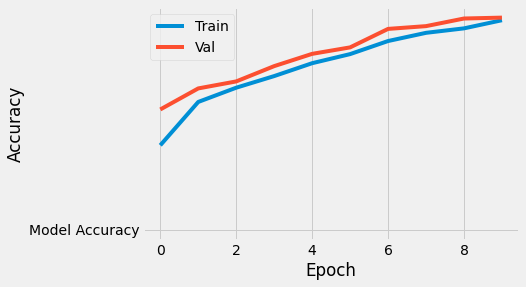

In [ ]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

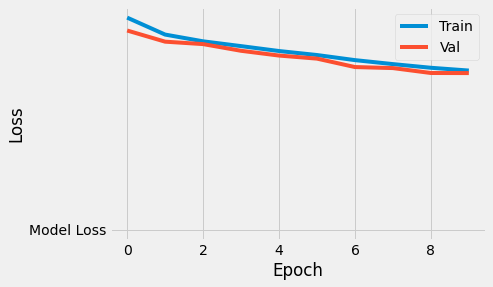

In [ ]:
#Visualize the model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
#Test the model with an example
from google.colab import files
uploaded = files.upload()

MessageError: ignored

In [ ]:
#Show the image
new_image = plt.imread('plane.jpg')
img = plt.imshow(new_image)

FileNotFoundError: ignored

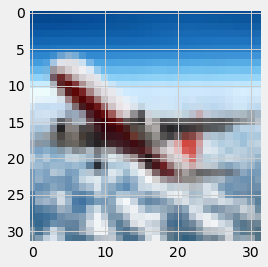

In [ ]:
#Resize the image
from skimage.transform import resize
resized_image = resize(new_image,(32,32,3))
img = plt.imshow(resized_image)
                 

In [ ]:
#Get the models predictions
predictions = model.predict(np.array([resized_image]))
#Show the predictions
predictions

NameError: ignored

In [ ]:
#Sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
   for j in range(10):
    if x[0][list_index[i]] >x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

#Show the sorted labels in order
print(list_index)

[0, 1, 9, 8, 7, 2, 4, 3, 5, 6]


In [ ]:
#Print the first 5 predictions
for i  in range(5):
   print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] *100,2), '%')


NameError: ignored